In [1]:
# installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


In [2]:
heart=pd.read_csv("/Users/shreyasingh/Downloads/Decision Tree/heart_disease1.csv")

In [3]:
heart.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,Female,atypical angina,105,198,False,normal,168,False,0.0,upsloping,normal,0
96,52,Male,non-anginal,138,223,False,normal,169,False,0.0,upsloping,normal,0
97,44,Male,non-anginal,120,226,False,normal,169,False,0.0,upsloping,normal,0
98,45,Male,atypical angina,128,308,False,lv hypertrophy,170,False,0.0,upsloping,normal,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [5]:
heart['sex']=heart['sex'].replace(['Male','Female'], [1,2])
heart['cp']=heart['cp'].replace(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'], [1,2,3,4])
heart['fbs']= heart['fbs'].replace(['True','False'], [1,2])
heart['restecg']=heart['restecg'].replace(['lv hypertrophy', 'normal', 'st-t abnormality'], [1,2,3])
heart['exang']= heart['exang'].replace(['TRUE','FALSE'], [1,2])
heart['slope']= heart['slope'].replace(['downsloping', 'flat', 'upsloping'], [1,2,3])
heart['thal']= heart['thal'].replace(['fixed defect', 'normal', 'reversable defect'], [1,2,3])

In [6]:
heart['fbs'] = heart['fbs'].astype('int64')  


In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000,908.000000,908.000000
mean,53.791850,1.209251,2.942731,133.430617,201.484581,0.203744,1.991189,135.957048,0.891253,2.155286,2.155286,1.008811
std,9.158031,0.406998,0.775181,20.401608,112.097949,0.403003,0.635177,26.804929,1.093875,0.691023,0.780908,1.144436
min,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,-2.600000,1.000000,1.000000,0.000000
25%,47.750000,1.000000,3.000000,120.000000,176.750000,0.000000,2.000000,118.000000,0.000000,2.000000,2.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,224.000000,0.000000,2.000000,138.000000,0.500000,2.000000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,144.000000,270.000000,0.000000,2.000000,156.000000,1.500000,3.000000,3.000000,2.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,6.200000,3.000000,3.000000,4.000000


In [8]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,1,145,233,1,1,150,False,2.3,1,1,0
1,41,1,2,135,203,0,2,132,False,0.0,2,1,0
2,57,1,3,140,192,0,2,148,False,0.4,2,1,0
3,52,1,1,118,186,0,1,190,False,0.0,2,1,0
4,57,1,3,110,201,0,2,126,True,1.5,2,1,0


In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(11)
memory usage: 86.1 KB


In [10]:
heart.shape

(908, 13)

In [11]:
# missing values
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [12]:
heart['oldpeak'] = heart['oldpeak'].fillna(heart['oldpeak'].median())

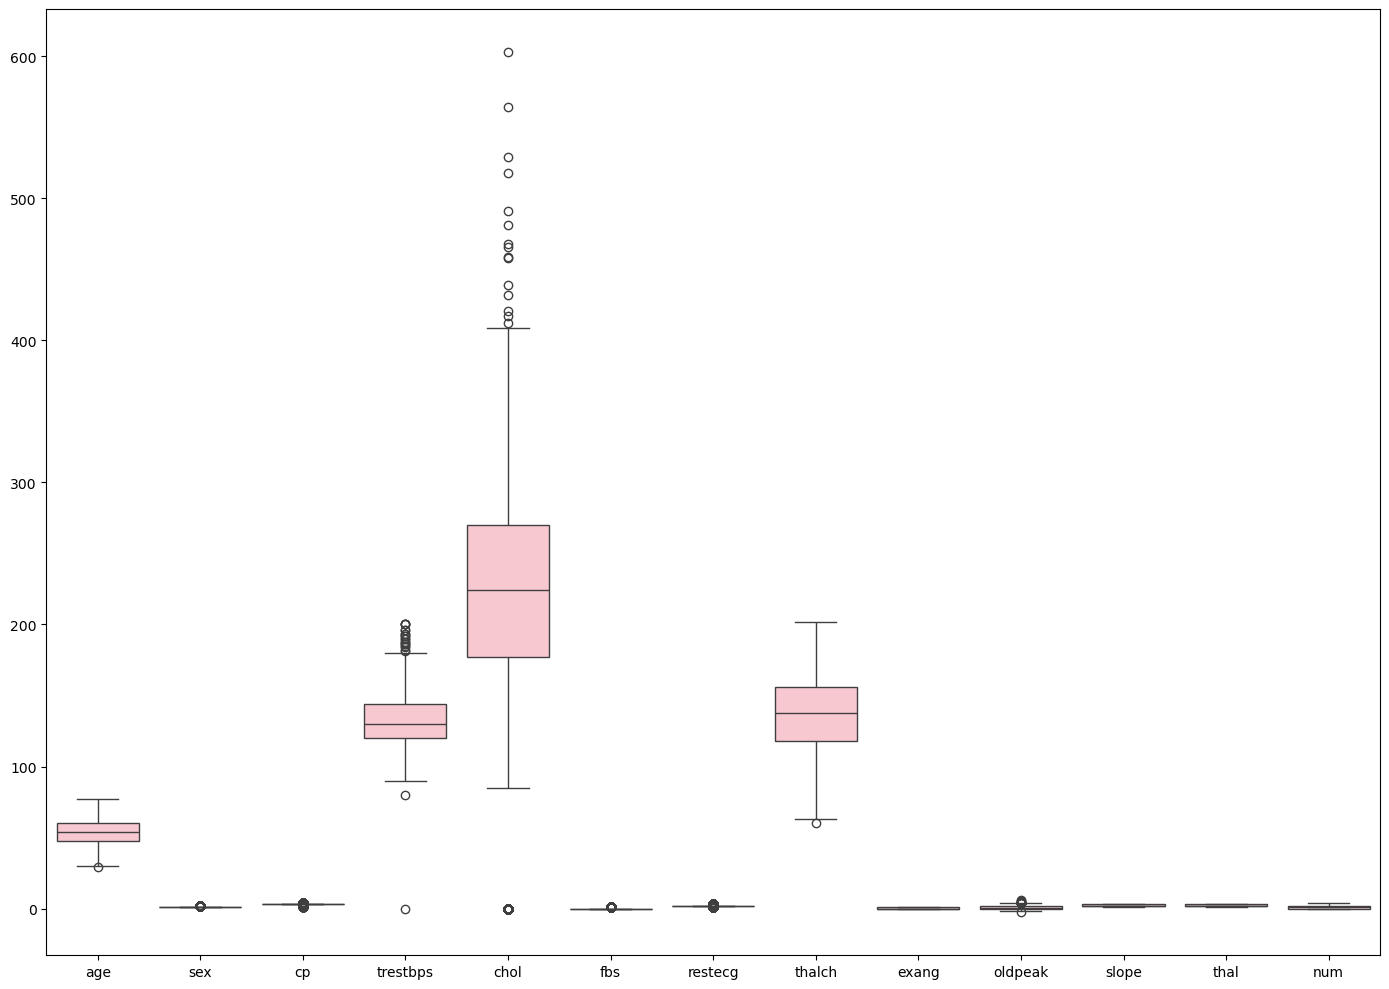

In [13]:
# Visualize Outliers using Box Plots
plt.figure(figsize=(14, 10))
sns.boxplot(heart, color='pink')
plt.tight_layout()
plt.show()

In [14]:
# Treat outliers using IQR capping
def outlier_Detection(heart,columns):
    for col in numerical_columns:
        Q1 = heart[col].quantile(0.25)
        Q3 = heart[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        heart[col] = np.where(heart[col] < lower_bound, lower_bound, heart[col])
        heart[col] = np.where(heart[col] > upper_bound, upper_bound, heart[col])
    

In [15]:
numerical_columns = heart.select_dtypes(include=['float64', 'int64']).columns.tolist()  

In [16]:
# Correlation Matrix
corr_matrix = heart[numerical_columns].corr()

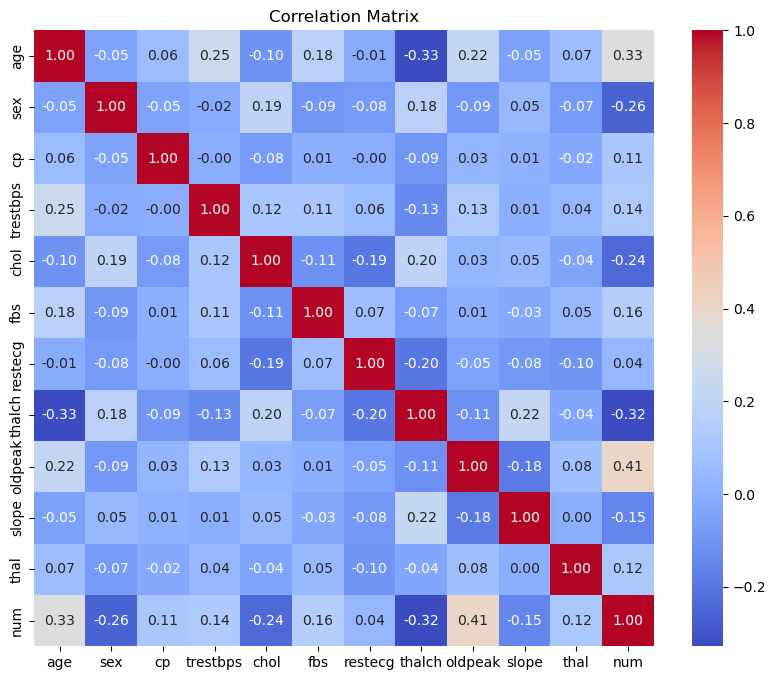

In [17]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [18]:
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']


In [19]:
# Using one-hot encoding for categorical features
data_encoded = pd.get_dummies(heart, columns=categorical_columns, drop_first=True)

In [30]:
#Scale Numerical Features
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
X = heart[numerical_columns]  
scaler = StandardScaler()  
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  

In [32]:
print("Processed Dataset Head:")
print(data_encoded.head())

Processed Dataset Head:
   age  trestbps  chol  fbs  thalch  oldpeak  num  sex_2  cp_2  cp_3  cp_4  \
0   63       145   233    1     150      2.3    0      0     0     0     0   
1   41       135   203    0     132      0.0    0      0     1     0     0   
2   57       140   192    0     148      0.4    0      0     0     1     0   
3   52       118   186    0     190      0.0    0      0     0     0     0   
4   57       110   201    0     126      1.5    0      0     0     1     0   

   restecg_2  restecg_3  exang_True  slope_2  slope_3  thal_2  thal_3  
0          0          0           0        0        0       0       0  
1          1          0           0        1        0       0       0  
2          1          0           0        1        0       0       0  
3          0          0           0        1        0       0       0  
4          1          0           1        1        0       0       0  


In [34]:
#training and testing
#Split dataset into features (X) and target (y)
X = heart.drop(columns=['num'])  
y = heart['num']

In [36]:
#Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,42,1,2,120,295,0,2,162,False,0.0,3,2
10,30,2,1,170,237,0,3,170,False,0.0,1,1
617,74,1,4,140,237,1,2,94,False,0.0,3,3
250,41,1,3,104,0,0,3,111,False,0.0,2,3
869,49,1,4,137,142,0,2,68,False,0.5,2,3


In [40]:
y_train

84     0
10     0
617    1
250    0
869    3
      ..
106    0
270    0
860    3
435    1
102    0
Name: num, Length: 726, dtype: int64

In [42]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,63,1,4,130,0,0,3,111,True,0.0,2,1
439,58,1,3,170,0,1,3,105,True,0.0,1,2
342,41,1,2,120,291,0,3,160,False,0.0,1,3
736,61,1,3,146,241,0,2,148,True,3.0,1,3
785,54,1,3,110,206,0,1,108,True,0.0,2,2


In [44]:
y_test

865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64

# Model building 

In [88]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred


array([3, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0,
       1, 2, 0, 3, 0, 1, 3, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 4, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 0, 3, 3, 1, 3, 0, 0, 2, 0, 0, 1,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0,
       3, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 3, 1, 0,
       2, 1, 0, 0, 0, 3, 4, 0, 0, 0, 0, 2, 1, 3, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2,
       2, 1, 0, 1, 1, 0])

In [90]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [92]:
dt_model.feature_importances_

array([0.13782898, 0.03422141, 0.06834429, 0.03808004, 0.21900211,
       0.        , 0.01355889, 0.09462613, 0.33253824, 0.06179991,
       0.        , 0.        ])

In [52]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

# Model evaluation

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        89
           1       0.42      0.38      0.40        48
           2       0.27      0.32      0.29        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.51      0.53      0.52       182



In [96]:
confusion_matrix(y_test,y_pred)

array([[69, 10,  4,  5,  1],
       [14, 18, 10,  6,  0],
       [ 6,  6,  7,  2,  1],
       [ 5,  8,  2,  2,  0],
       [ 1,  1,  3,  1,  0]])

In [98]:
dt_model.score(X_train,y_train)
dt_model.score(X_test,y_test)


0.532967032967033

In [100]:
trainpred=dt_model.predict(X_train)
accuracy_score(y_train,trainpred)
train_report=classification_report(y_train,trainpred)
confusion_matrix(y_train,trainpred)

array([[261,  37,   1,  10,   1],
       [ 68, 126,   6,  15,   2],
       [ 18,  38,  11,  16,   4],
       [ 18,  36,   0,  31,   5],
       [  9,   4,   0,   3,   6]])

In [102]:
accuracy_score(y_train,trainpred)

0.5991735537190083

In [104]:
testpred=dt_model.predict(X_test)
accuracy_score(y_test,testpred)
test_report=classification_report(y_test,testpred)
confusion_matrix(y_test,testpred)

array([[73,  9,  1,  6,  0],
       [19, 21,  1,  6,  1],
       [ 4, 11,  1,  4,  2],
       [ 5, 10,  0,  2,  0],
       [ 1,  3,  0,  2,  0]])

In [106]:
accuracy_score(y_test,testpred)

0.532967032967033

In [108]:
print('Training accuracy: ', dt.score(X_train,y_train))
print('Testing Accuracy: ', np.round(dt.score(X_test,y_test),2))

Training accuracy:  1.0
Testing Accuracy:  0.53
